<a href="https://colab.research.google.com/github/UrviSoni/the_spark_foundation/blob/main/prediction_using_supervised_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation**

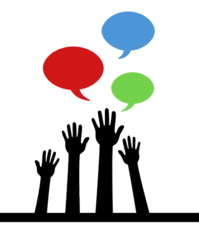



---

###***`Task:- Prediction Using Supervised ML`***


---



*   Created By:- [Urvi Soni](https://www.linkedin.com/in/urvisoni6/)







---


***Predict the percentage of an student based on the no. of study hours.***


---



***Step 1:-*** ***Import required Libraries***

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

***Step 2:- Load The Dataset***

In [65]:
s = pd.read_csv('/content/student_score.csv') # read_csv() function imports a CSV file to DataFrame format

In [66]:
s.head() # head() method is used to return top n (5 by default) rows of a data frame or series

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***Step 3:- EDA (Exploratory Data Analysis)***

In [67]:
s.shape # "shape" returns the shape of an array. The shape is a tuple of integers. The "shape" of an array is a tuple with the number of elements per axis (dimension).

(25, 2)

In [68]:
s.info() # info() prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [69]:
s.describe() # describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000




*   ***loc :-*** `loc` is label-based, which means that we have to specify the name of the rows and columns that we need to filter out



*   ***iloc :-*** `iloc` is integer index-based. So here, we have to specify rows and columns by their integer index




In [70]:
X = s.iloc[:, :-1].values 
Y = s.iloc[:, 1].values

In [71]:
X = s.iloc[:,:-1]
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [72]:
X = s.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [73]:
Y = s.iloc[:,1]
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [74]:
Y = s.iloc[:,1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [76]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, random_state= 0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scores Distribution')

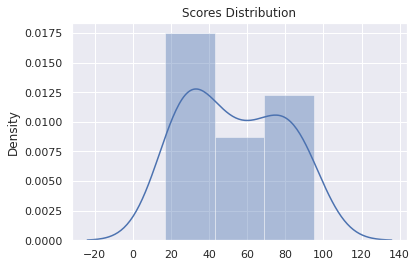

In [77]:
sns.distplot(Y_train, kde=True) # kde (Kernel Density Estimation) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis
plt.title('Scores Distribution')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hours VS Scores')

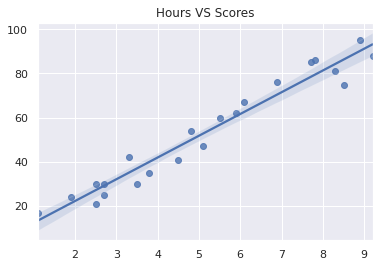

In [78]:
sns.regplot(X_train, Y_train) # regplot() method is used to plot data and a linear regression model fit
plt.title('Hours VS Scores')

***Step 4:- Create A Model***

In [79]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# predicting the test set results
Y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df.head()

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


***Step 5:- Visualize the Result***

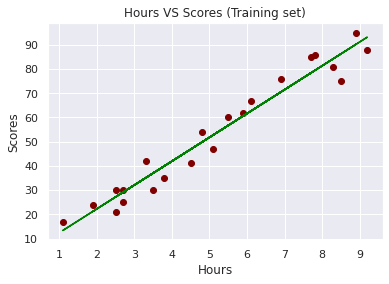

In [81]:
#visualising the training set results
plt.scatter(X_train, Y_train, color = 'maroon')
plt.plot(X_train,  regressor.predict(X_train), color= 'green')
plt.title('Hours VS Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


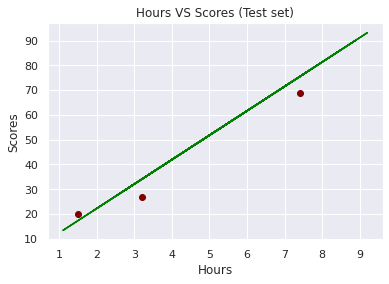

In [82]:
#visualising the test set results
plt.scatter(X_test, Y_test, color = 'maroon')
plt.plot(X_train,  regressor.predict(X_train), color= 'green')
plt.title('Hours VS Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


***Step 6:- Model Evaluation***

In [83]:
k = X_test.shape[1] # "shape" returns the shape of an array.
n = len(X_test)
n

3

***R2 Score (Coefficient of Determination):-***  R2 score is used to evaluate the performance of a linear regression model

In [84]:
from sklearn.metrics import r2_score
from math import sqrt

r2 = r2_score(Y_test, Y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2)

R2 = 0.9298077534821835 
Adjusted R2 = 0.859615506964367


***Step 7:- Predict Future Data***

In [85]:
Hours = 9.25
pred = regressor.predict([[Hours]])

print('Hours =', Hours, '\nPrediction =', pred)

Hours = 9.25 
Prediction = [93.67656425]




---


Q 1:- What will be the predicted score if a student studies for 9.25 
hrs/day?

=> If A Student studies for 9.25 hrs/day, predicted score will be **`93.67656425`**


---

